# Train a Smartcab to Drive

##  Implement a Basic Driving Agent

### 1. Observe what you see with the agent's behavior as it takes random actions. Does the **smartcab** eventually make it to the destination? Are there any other interesting observations to note?

#### Basic driving agent is implemented in agent1.py with enforce_deadline = False and 'end_trial_time' = -100 added in environment.py ,which makes the trial end to evade deadlock when the decreased deadline hit this 'end_trial_time' value. 
- The basic driving agent is not concerned with any sort of driving policy but choose random action from the set of possible actions such as None, forward, left, right at each intersection. But it does not make reference for such informations as next waypoint, traffic light, current time left from the alloted deadline.

- The driving agent arrives in the destination with the radom movement across a map eventually but rarely within a time limit and with lots of moves such as 7551 moves over 100 trials.

In [192]:
#import agent1.py log file to show number of agent's successful reach to the destination out of 100 trials 
#with enforce_deadline=False 
import pandas as pd
pd_result = pd.read_csv("./s_submit/smartcab1/log/agent1/1111_final_enfocedeadline_false/success_total_agent1.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
0,0,1,100,2.0,-4.5,19,31,0.61
1,0,2,100,-0.5,-35.5,102,152,0.67
2,0,3,100,2.0,-50.5,179,278,0.64
3,1,4,100,12.0,-44.5,205,315,0.65
4,1,5,100,-0.5,-52.5,225,346,0.65
5,1,6,100,-0.5,-58.5,253,393,0.64
6,2,7,100,9.5,-67.0,315,494,0.64
7,2,8,100,-1.0,-67.5,335,530,0.63
8,2,9,100,0.0,-92.5,400,635,0.63
9,2,10,100,2.0,-108.0,467,756,0.62


#### Mean of penalties/moves ratio is 0.624, which will be compared with that of Q learning agent  in  later  part.

In [174]:
print pd_result['penalties_vs_moves'].mean()

0.624


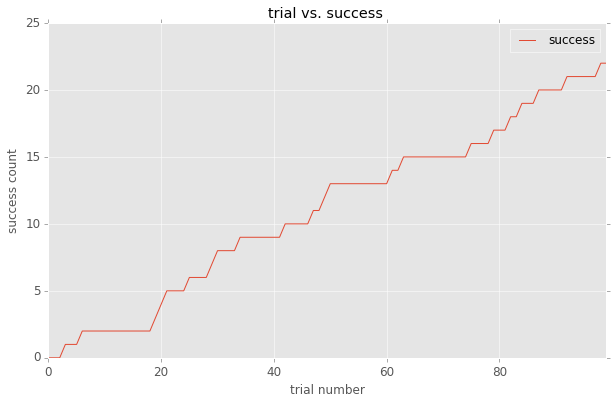

In [60]:
import numpy
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display # Allows the use of display() for DataFrames
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
matplotlib.style.use('ggplot')
pd_success = pd_result['success']
ax = pd_success.plot( title ="trial vs. success ",figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("trial number",fontsize=12)
ax.set_ylabel("success count",fontsize=12)
plt.show()

### As show above chart,lines paralle to x-axis imply that the agent failed to reach the destination since the success  count is the same as that of previous trial
The several parallel lines to x-axis such as trial number around 10 to 20, 50 to 60, 60 to 70 exist on above chart , which means  there is no leaning from previous action , rewards.

#### As show above, the basic agent in agent1.py reached the destination 22 times out of 100 trials which makes poor 22% success ratio with enforce_deadline = False and 'end_trial_time' = -100  in environment.py ,which makes the trial stop not to fall in deadlock when the decreased deadline hit this 'end_trial_time' value. 
- Also, at 100 trials, it shows total 7551 movements, -1227 rewards and 4662 total penalties which caused by incorrect actions such as  violating traffic rules or accident. 
- From above chart, I could say, with unlimited time, but together with very large number of movemements, the agent eventually reach the destination through movements into random directions such as None, 'forward','left','right'.
This poor performance may be caused by random action regradless of traffic rule , without the help of planning or Qlearning algorithm. 
The agent does not take into the consideration of rewards gained and not perfer the previous actions

#### After changing agent1.py to modify enforce_deadline = True with max_trials=100, As for this randome action of agent, the success ratio  over 100 trials is respectively 17%, 14%, 20%. The results are shown belows.
In follwing charts , total rewards are respectively -545, -440, -380 and penalties are 1836, 1752, 1672. Also total movements of agent over 100 trials are 2869, 2783, 2648. 
I will compare these charts with that of QLearning agent to demonstrate the superiority of QLearning algorithm in terms of success ratio.

In [62]:
pd_result = pd.read_csv("./s_submit/smartcab1/log/agent1/1111_final_enfocedeadline_true/success_total_agent1.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result.tail()

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
95,16,96,100,0.0,-531.5,1772,2763,0.64
96,17,97,100,12.0,-524.0,1780,2781,0.64
97,17,98,100,-0.5,-529.5,1810,2827,0.64
98,17,99,100,0.0,-536.0,1823,2848,0.64
99,17,100,100,0.0,-545.0,1836,2869,0.64


In [63]:
pd_result = pd.read_csv("./s_submit/smartcab1/log/agent1/1111_final_enfocedeadline_true2/success_total_agent1.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result.tail()

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
95,14,96,100,2.0,-406.5,1664,2654,0.63
96,14,97,100,-0.5,-421.5,1690,2690,0.63
97,14,98,100,2.0,-427.0,1707,2716,0.63
98,14,99,100,-0.5,-439.5,1734,2757,0.63
99,14,100,100,0.0,-444.0,1752,2783,0.63


In [64]:
pd_result = pd.read_csv("./s_submit/smartcab1/log/agent1/1111_final_enfocedeadline_true3/success_total_agent1.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result.tail()

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
95,20,96,100,-0.5,-349.5,1592,2534,0.63
96,20,97,100,-0.5,-362.5,1613,2560,0.63
97,20,98,100,-0.5,-364.0,1631,2591,0.63
98,20,99,100,0.0,-374.5,1652,2622,0.63
99,20,100,100,-0.5,-383.5,1672,2648,0.63


### Interesting observation: 
As shown below table, the agent's act is not based on the previous action and previous rewards, in other words, it is in "finding" mode instead of "utilizing" mode . So it does not make use of previous rewarding actions but take new action regardless of previous rewading action.
For example, in below table, at step 19, 21 in which light is red, agent choose action 'forward' eventually produce poor rewards not knowing the traffic rule. And it got stuck at same position over many times since it choose action, None regrdless of traffic light or oncoming traffic.


In [65]:
pd_result = pd.read_csv("./s_submit/smartcab1/log/agent1/1111_final_enfocedeadline_false/forcsv.csv",
                       names=['start[0]','start[1]','dest[0]','dest[1]','inputs_oncoming','inputs_left','inputs_right',
                              'light', 'action','heading[0]','heading[1]','location[0]','location[1]','reward'])
pd_result

,start[0],start[1],dest[0],dest[1],inputs_oncoming,inputs_left,inputs_right,light,action,heading[0],heading[1],location[0],location[1],reward
0,(1,4),(7,4),None,None,None,green,forward,(1,0),(2,4),-0.5
1,(1,4),(7,4),None,None,None,green,forward,(1,0),(3,4),-0.5
2,(1,4),(7,4),None,None,None,red,left,(1,0),(3,4),-1.0
3,(1,4),(7,4),None,None,None,red,right,(0,1),(3,5),-0.5
4,(1,4),(7,4),None,None,None,green,None,(0,1),(3,5),0.0
5,(1,4),(7,4),None,None,None,green,None,(0,1),(3,5),0.0
6,(1,4),(7,4),None,None,None,red,right,(-1,0),(2,5),-0.5
7,(1,4),(7,4),None,None,None,green,right,(0,-1),(2,4),-0.5
8,(1,4),(7,4),None,None,None,green,right,(1,0),(3,4),2.0
9,(1,4),(7,4),None,None,None,green,None,(1,0),(3,4),0.0


### As shown below, each action choose action randomly and the frequency of each action is almost even, such as None is 1950, forward is 1883, left is 1912 and right is 1862

In [67]:
from collections import Counter 
import string
doc1 = pd_result['action']
action_count = Counter(doc1)
action_count

Counter({'None': 1950, 'forward': 1883, 'left': 1912, 'right': 1862})

### Traffic rule violated action:  The numbe of 'forward ' action taken in case of 'red' light is 976 out of  agent's total 7607 actions , 12.8%

In [68]:
pd_light_action = pd_result[['light','action']]
pd_light_action['bad_action']=pd_light_action.apply(lambda x: x['light']=='red' and x['action']=='forward', axis = 1)
print "Number of action 'forward' taken in spite of light' red is ", len(pd_light_action[pd_light_action['bad_action']])
print "Percentage : ", len(pd_light_action[pd_light_action['bad_action']])/float(len(pd_light_action['bad_action']))*100,"%"

Number of action 'forward' taken in spite of light' red is  976
Percentage :  12.8302878927 %


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


#### As show below,At the continuos step 122,123,124,125 and the contious step 7538,7539,7540,7541, action is all None, So  it got stuck at same position over many times since it choose action, None regrdless of traffic light or oncoming traffic.

In [139]:
result_none =pd_result.loc[pd_result['action']=='None']['action']
pd_result=pd.DataFrame(result_none)
pd_result.index.name='step'
pd_result

,action
step,
4,None
5,None
9,None
13,None
16,None
24,None
25,None
29,None
33,None


## Inform the Driving Agent

### Identify States

### 2.  What states have you identified that are appropriate for modeling the **smartcab** and environment? Why do you believe each of these states to be appropriate for this problem?

### This is implemented in agent2.py
In the next Qlearning algorithm, There are following set of states to consider to model the driving agent. 
- Light : this is the state of traffic light consists of 2 variables such as 'red' and 'green'. agent should learn what actions to take in each traffic light to get best rewards.
- Waypoint  : It consists of 4 variables such as None, 'Left', 'Right', 'Forward'. 
- Oncoming :It consists of 4 variables such as None, 'forward', 'left', 'right'. Oncoming traffic is the important factor for the agent to move. if there is oncoming traffic, traffic rule don't allow  left turn or else agent crash into the oncoming car. 
- Left : It consists of 4 variables such as None, 'forward', 'left', 'right'. If there is traffic coming from the left then   we cannot move left   or right, else we will crash.
- Right : It consists of 4 variables such as None, 'forward', 'left', 'right'. Agent shoud learn the traffic rule for the car coming from left. 

### In agent2.py(RoutePlanner agent) and agent.py(Qlearning agent), 2 states  such as waypoint, light are used to model the driving agent.
Since there are 4 cars, dummy agents in the car simulation environment, which makes the probability to collide each other on right, left or oncoming direction extremly low. Even if they collide, there are no penalties for these happenings. So the status such as oncoming, left, right may have little meaning in modeling driving agent.
The status used in this simulation are 4 variables  (None, Left, Right, and Forward) and traffic light consists of 2 variables (green , red), which makes 4 + 2 = 6 states. This 6 states are coupled with 4 different actions such as None, Left, Right , Forward. Total state action pair is 6 x 4 = 24 , which shoud be trained to optimize to get the destination.
There is no need to consider deadline to train QLearning agent even though it is used for the statics analysis of agent movement. since the redundant state makes the training time much longer and lower performance. (distance from start position to destination position can be from 1 to 12 step, so, deadline can be 5(1 x 5) to 60(5 x 12), deadline variable span can be 56(60 -5 +1). From this , I can compute action state pair to train by state actoin pair, 24 x 56(deadline span), which is total 1344 )
- in agent.py
  - def get_final_statics(self, deadline, rewoard, max_trilas): 
- in environment.py  
  - def reset(self):
      - deadline = self.compute_dist(star, destination) *5 



## Implement a Q-Learning Driving Agent

### 3.  What changes do you notice in the agent's behavior when compared to the basic driving agent when random actions were always taken? Why is this behavior occurring?

### Q-Learning Driving Agent is implemented in agent.py
QLearning agent can pick the best action available from the current state based on Q-values, and return best action instead of  random action such as None, Left, Right, Forward. this action is achieved through  the mechanism of initializing , updating Qvalue in Q dictionary.Each action generate rewards and penalties, which are taken into the consideration in case of updating Q dictionary.

With Q-Leanging agent, it could reach the destination with less move, less penalties, better rewards and better success rate, since the agent could learn the rule of traffic lights and act according to the next_waypoint of planner. This agent need to take into the consideration of following states.
   - self.next_waypoint = self.planner.next_waypoint()
   - self.state = (slef.next_waypoint, inputs['light'])

- Q update module  : It update Q value according to previous state, previous action,  reward and  state. Agent select action according to Q values in Qdictionary, which are learned by next step's reward added by the dicounted future max Q value
      def update_Q(self,previous_state, previous_action,previous_reward,state ): 
         self.Qdictionary[(previous_state,previous_action)] = (1 - self.learning_rate) *   
         self.Qdictionary[(previous_state,previous_action)] + \
         self.learning_rate * (self.previous_reward + self.discount_factor * self.get_Qmax(self.state)[0])

### The agent adopt learnig rate 0.7 , discounting factor 0.1, epsilon 0.1 with initial Q value is 1. After 3 times excution of this Qlearning agent script,  it could  achieve respectively  94/100(94 succee out of 100 trial), 97/100 ,97/100 .  These are far better than 17/100, 14/100 , 20/100 of basic agent.
whereas the model of same parameter with initial Q value, 0 makes respectively 81/100, 94/100, 98/100. 
- So I choose QLearning Agent model with these parameter values and initial Q value 1.

#### The statics analysis of agent.py is as follows . Following chart shows every states( light, waypoint) in every move over 100 trials.

In [160]:
pd_result = pd.read_csv("./s_submit/logs/LearningAgent_update1111_1.csv",
                       names=['deadline','light','oncoming','right','left','action','reward'])
pd_result

,deadline,light,oncoming,right,left,action,reward
0,30,green,None,None,None,left,0.5
1,29,red,None,None,None,forward,-1.0
2,28,red,None,None,None,None,1.0
3,27,red,None,None,None,None,1.0
4,26,red,None,None,None,left,-1.0
5,25,green,None,None,None,right,2.0
6,24,green,None,None,None,None,1.0
7,23,green,None,None,None,right,2.0
8,22,green,None,None,None,right,0.5
9,21,red,None,None,None,None,1.0


#### As shown above, total steps to move until 100 trial is 1505 comparing with that of basic agent, 7606, which means it provide better performance in terms of qucik reach to the destination with increased success ratio.

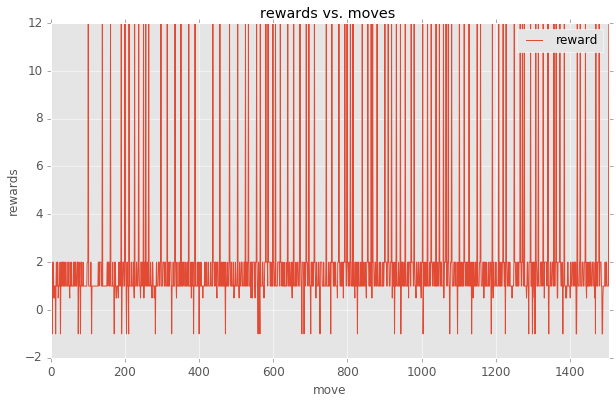

In [161]:
result_r = pd_result['reward']
ax = result_r.plot(title ="rewards vs. moves ",figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("move",fontsize=12)
ax.set_ylabel("rewards",fontsize=12)
plt.show()

####  As show above chart of first execution of agent.py program, In left most part, where agent start to learn the traffic rule through Q learning algorithm and rewards and penalties.So this area has many small rewards 2  but litte number of 12 rewards(succss to reach the destination). But as the agent move on, more number of 12 rewards(success) appear.

####  Traffic rule violated action:  As show above ,The numbe of 'forward ' action taken in case of 'red' light is 18 out of agent's total 1505 actions ,1.2% , which is far better than that of basic agent , 97/7607, 12.8 %

In [154]:
pd_light_action = pd_result[['light','action']]
pd_light_action['bad_action']=pd_light_action.apply(lambda x: x['light']=='red' and x['action']=='forward', axis = 1)
print "Number of action 'forward' taken in spite of light' red is ", len(pd_light_action[pd_light_action['bad_action']])
print "Percentage : ", len(pd_light_action[pd_light_action['bad_action']])/float(len(pd_light_action['bad_action']))*100,"%"

Number of action 'forward' taken in spite of light' red is  18
Percentage :  1.19521912351 %


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


- Below chart shows third excution of agent.py, which shows 97/100 success, reward, total reward, penalties moves and penalties/moves ratio. 

In [185]:
pd_result_q = pd.read_csv("./s_submit/logs/success_total1111_3.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result_q

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
0,1,1,100,12.0,36.0,2,22,0.09
1,2,2,100,12.0,89.5,5,60,0.08
2,3,3,100,12.0,125.0,5,78,0.06
3,4,4,100,12.0,155.0,5,91,0.05
4,5,5,100,12.0,198.5,5,117,0.04
5,6,6,100,12.0,224.5,5,129,0.04
6,7,7,100,12.0,273.0,8,163,0.05
7,8,8,100,12.0,294.0,8,170,0.05
8,9,9,100,12.0,325.0,8,184,0.04
9,10,10,100,12.0,359.0,8,201,0.04


####  Mean of penalties/moves ratio is 0.0276. This is far smaller  comparing with  0.624  of basic agent, which means less penalties happen over each move.

In [187]:
print pd_result_q['penalties_vs_moves'].mean()

0.0276


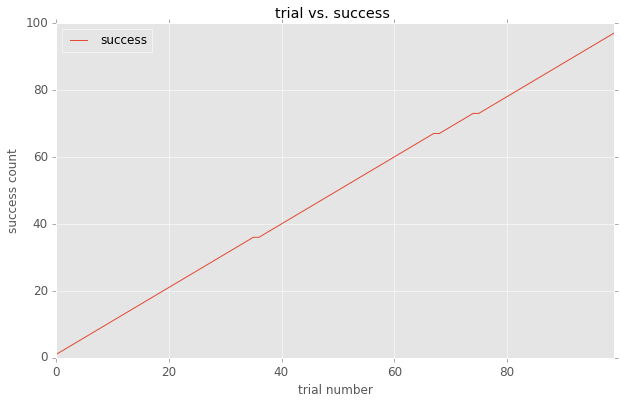

In [188]:
pd_success = pd_result_q['success']
ax = pd_success.plot( title ="trial vs. success ",figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("trial number",fontsize=12)
ax.set_ylabel("success count",fontsize=12)
plt.show()

- Comparing with chart of basic agent, in which there are lots of line paralle to x-axis( trials in which the agent failed to reach the destination), but above chart with Q learning agent has no line parallel with x-axis, which means almost success to reach the destination since it achieves 97 /100 success rate.

## Enhance the driving agent

### 4. Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform?

### 5. Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem?

In agent.py, I implemented 3 layer for loop consist of learning rate in [0.7, 0.8 , 0.9] with the intention of learning from more recent information, dicount factor in [0.1, 0.2 ,0.3 ,0.33, 0.4, 0.44] with more focusing on the current rewards and epsilon in [0.0, 0.1, 0.2 ,0.3 0.4] with . After exhausitive search for the optimal parameters,I found two optimal parameter pairs, one is ( learning rate 0.7, discount factor 0.1, epsilon 0.1) the other is (0.9, 0.33, 0.1). Each of them similarly makes the best frequency, 97 to succeed to reach the destination out of 100 try. After flipping the coin, I would choose (0.7, 0.1 ,0.1) pairs to implement Learning agent, which perform far better than basic agent whose success ratio used be 17, 14, 20 out of 100 trials.

- Learning  rate to determine to what extent the newly acquired information will override the old information from 0 to 1.
  '0' signify no learning for agent, '1' means the agent olny consider the most new information. In this model, the optimal learning rate is  0.7, which means this model consider the recent information more than old one.
- Discounting factor ranging from 0 to 1 decide the adoptioin of future rewards. Agent model with dicount factor 0 just consider current rewards, whereas that with 1 just takes into the consideration of maximizing total rewards. This model has optimal value 0.1, which is close to 0, means it consider current rewards more than maximizing total rewards.
- Epsilon could be used to pick between random action and explore new paths. Higher epsilon implies more exploration , less exploitation to choose random action to optimal policy, which is accomplished by more exhausitive search over all possible actions. This model incorporate lower epsilon 0.1 means less exploration, more exploitation.So this model act on the optimal policy more than the random action. 


#### After exhaustive search with  for loop with learning rate ,  discount factor, epsilon, I found following combination of parameters to produce best performanc in terms of succe number out of 100 trials. As shown below,  (0.7, 0.1 ,0.1) pairs and   (0.9, 0.33, 0.1) paris have the most optimal result of 97/100 . then follows (0.8, 0.4, 0.1) and (0.8, 0.1, 0.1). Below chart is top five  parameter combination list which are made of learning rate, dicount factor, epsilon to produce best success 


In [200]:
pd_optimal = pd.read_csv("./s_submit/logs/optimal_result1111.csv",
                       names=['learnig_rate','discount_factor','epsilon','success','total_reward'])
pd_optimal['learnig_rate'] = pd_optimal['learnig_rate'].str.strip('[')
pd_optimal['total_reward'] = pd_optimal['total_reward'].str.strip(']')

pd_optimal_p =pd.DataFrame(pd_optimal)
pd_optimal_p.index.name='step'
pd_optimal_p
pd_optimal_p.sort(['success'],ascending=False).head()

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,learnig_rate,discount_factor,epsilon,success,total_reward
step,,,,,
1,0.7,0.10,0.1,97,3061.5
76,0.9,0.33,0.1,97,2958.0
51,0.8,0.40,0.1,96,3041.0
31,0.8,0.10,0.1,96,2939.5
16,0.7,0.33,0.1,95,2954.0


In [217]:
pd_result_q = pd.read_csv("./s_submit/logs/success_total1111_1.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])


In [219]:
pd_result_q['reward_vs_move'] = pd_result_q['total_reward']/pd_result_q['moves']
pd_result_q.tail()


,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves,reward_vs_move
95,89,96,100,12,2828.0,39,1429,0.03,1.979006
96,90,97,100,12,2859.0,39,1443,0.03,1.981289
97,91,98,100,12,2905.0,40,1471,0.03,1.974847
98,92,99,100,12,2930.0,40,1480,0.03,1.979730
99,93,100,100,12,2969.5,42,1506,0.03,1.971780


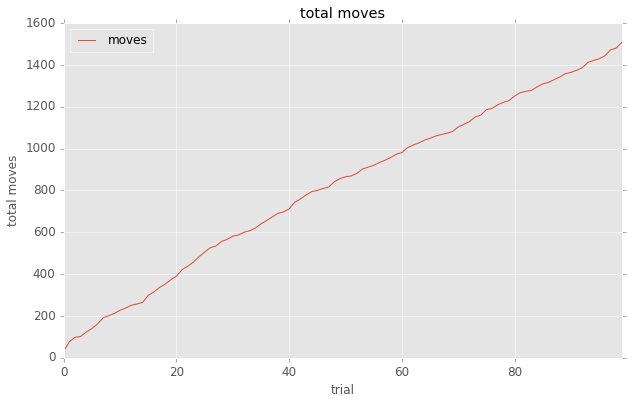

In [231]:
pd_result_q_pm = pd_result_q['moves']
ax = pd_result_q_pm.plot( title ='total moves',figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("trial",fontsize=12)
ax.set_ylabel("total moves",fontsize=12)
plt.show()


- Comparing with basic agent which act randomly, Q learning agent get to the destination faily quicky with minimum possible time(97 success out of 100 trial with 1372 moves) comparing with basic agent(22 success out of 100 with 7551 moves).
Also Q learning agent has incurred almost no panalties such as mean penalts per each move of 0.0276 comparing with  0.624 of basic agent. 

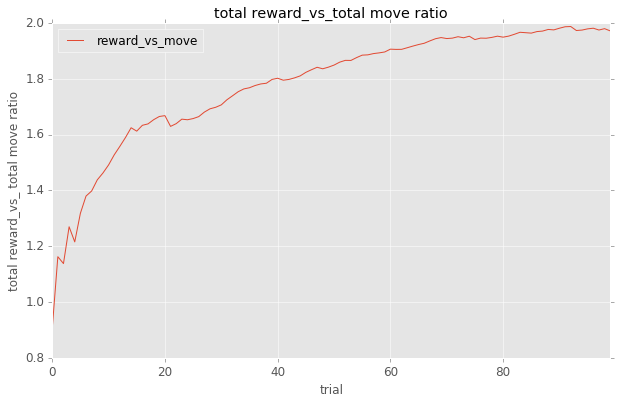

In [236]:
pd_result_q_rm = pd_result_q['reward_vs_move']
ax = pd_result_q_rm.plot( title ='total reward_vs_total move ratio',figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("trial",fontsize=12)
ax.set_ylabel("total reward_vs_ total move ratio",fontsize=12)
plt.show()

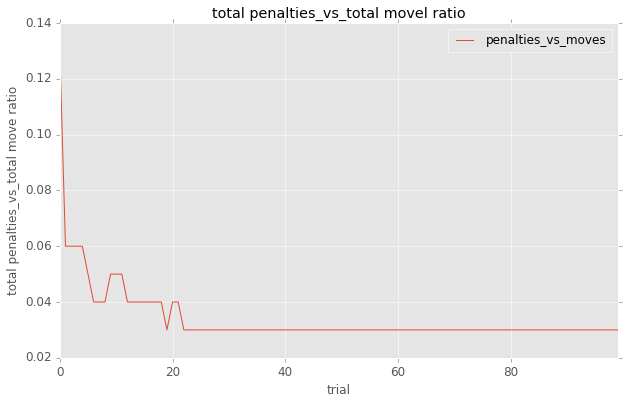

In [237]:
pd_result_q_pm = pd_result_q['penalties_vs_moves']
ax = pd_result_q_pm.plot( title ='total penalties_vs_total movel ratio',figsize=(10,6),legend=True, fontsize=12)
ax.set_xlabel("trial",fontsize=12)
ax.set_ylabel("total penalties_vs_total move ratio",fontsize=12)
plt.show()

- As show above total reward vs move chart. 
In the starting stage of trial of 100, the accumulated reward per a move at each trial increse rapidly, even though the increasing rate of this value is diminished as trials go on but this reward per move ratio is still increasing, which could imply that the agent learn to reach the destination from previous action, rewads to optimize  at statring stage more than the ending stage. The agent could reach the destination in less time of move and as fast as it can. 
And as shown above , agent reaches the destination with a positive cumulative rewards and it incurs almost no penalties as low as 0.0276 , total pelanties divided by total movement at each trial. 
As for total penalties_vs_move ratio chart,  total penaltie per total move decrease rapidly as agent act on Q learning mechanism but in latter part, It has almost non penalties such as mean value of 0.0276.

Thus, this QLearning agent has learned the optimal policy to reach the destination quicky with right move according to traffic rule and smallest movement steps.  

- Following charts shows the analysis information for the second, third excution of Q learning agent program , which produce   97/100 success, altogether.

In [202]:
pd_result_q = pd.read_csv("./s_submit/logs/success_total1111_2.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result_q.tail()

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
95,93,96,100,12,2777.5,31,1342,0.02
96,94,97,100,12,2801.5,31,1350,0.02
97,95,98,100,12,2836.5,31,1368,0.02
98,96,99,100,12,2866.5,32,1383,0.02
99,97,100,100,12,2897.5,33,1401,0.02


In [203]:
pd_result_q = pd.read_csv("./s_submit/logs/success_total1111_3.csv",
                       names=['success','total','max_trial','reward','total_reward','penalties','moves','penalties_vs_moves'])
pd_result_q.tail()

,success,total,max_trial,reward,total_reward,penalties,moves,penalties_vs_moves
95,93,96,100,12.0,2793.0,33,1330,0.02
96,94,97,100,12.0,2826.0,33,1347,0.02
97,95,98,100,12.0,2848.0,33,1353,0.02
98,96,99,100,12.0,2877.0,33,1365,0.02
99,97,100,100,12.0,2899.0,33,1372,0.02
